# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusions](#Conclusions)



<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


>**Tip**: Please save your work regularly.

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
# importing csv
df= pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
# finding the shape (number of rows and columns)
df.shape

(294478, 5)

**c.** The number of unique users in the dataset.

In [4]:
#find the number of unique users
df['user_id'].nunique()

290584

**d.** The proportion of users converted.

In [5]:
# finding the overall conversion rate
df.converted.mean()

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
# finding if there are any false data (where treatment group didn't match with new page)
df.query("(group == 'treatment' and landing_page == 'old_page')").shape[0]

1965

**f.** Do any of the rows have missing values?

In [7]:
# finding if there are any missing values (NaN)
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Removing the false data and storing it in the new df2
df2= df.copy()
df2= df2[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) != False]
df2.head()


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [9]:
# checking if there are still in false data
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [10]:
# finding the number of unique users in the new df2
df2['user_id'].nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# finding the user_id of the duplicated user
duplicated_user= df2[df2['user_id'].duplicated()==True]['user_id']
duplicated_user

2893    773192
Name: user_id, dtype: int64

**c.** Display the rows for the duplicate **user_id**? 

In [12]:
#finding the duplicated rows
duplicated_user_rows= df2[df2['user_id']== 773192]
duplicated_user_rows

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [13]:
#droping the second instance as the have the same values. 
df2.drop(2893, inplace= True)
# making sure that the row is deleted

duplicated_user_rows= df2[df2['user_id']== 773192]
duplicated_user_rows

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


In [14]:
# finding the overall conversion rate
overall_converted= df2['converted'].mean()
overall_converted

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
# finding the  conversion rate of the control group
control_converted= df2.groupby('group')['converted'].mean()[0]
control_converted

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
# finding the  conversion rate of the treatment group
treatment_converted= df2.groupby('group')['converted'].mean()[1]
treatment_converted

0.11880806551510564

In [17]:
# Calculating the observed difference betweeen the new and old pages conversion rate.
obs_diff= (treatment_converted - control_converted)
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [18]:
# finding the probability of receving new page
prop_of_new_page= df2.query('landing_page == "new_page"')['landing_page'].count() / df2['landing_page'].count()
prop_of_new_page

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>**Answer**:
>
>from the presented data, about 12% of the control group converted, while 11.8% of the treatment group converted. with about 50% of the instances both groups, the new page had lower conversions.


<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

>**Answer:**
>
> $H_0: P_{old} - P_{new} >= 0$
>
> $H_1: P_{old} - P_{new} < 0$

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [19]:
#setting the new probability for the new page
P_new= overall_converted
P_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [20]:
#setting the new probability for the old page
P_old= overall_converted
P_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>

In [21]:
# finding the number of the treatment individuals
n_new= df2.groupby('group')['converted'].count()[1]
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [22]:
# finding the number of the control individuals
n_old= df2.groupby('group')['converted'].count()[0]
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>


In [23]:
#sampling treatment group

new_page_converted= np.random.choice((0, 1), size= n_new, p=(1-P_new, P_new))
new_page_converted

array([0, 0, 0, ..., 0, 0, 1])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [24]:
#sampling control group
old_page_converted= np.random.choice((0, 1), size= n_old, p=(1-P_old, P_old))
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [25]:
# finding the difference of the sampled data
diff_converted = new_page_converted.mean() - old_page_converted.mean()
diff_converted

-0.0004976845564060584


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [26]:
# Bootstraping our sampling distribution
p_diffs = []
p_sample_old= np.random.binomial(n_old, P_old, 10000)/n_old
p_sample_new= np.random.binomial(n_new, P_new, 10000)/n_new
p_diffs= p_sample_new - p_sample_old


In [27]:
# changing the list to array to be easily interpreted
p_diffs= np.array(p_diffs)

In [28]:
#finding the mean of the calculated differences
p_diffs.mean()

-7.943110331950887e-07

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  



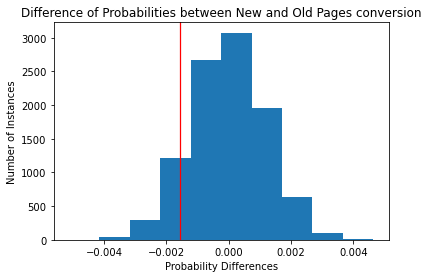

In [29]:
#plotting our results
plt.xlabel("Probability Differences")
plt.ylabel("Number of Instances")
plt.title("Difference of Probabilities between New and Old Pages conversion")
plt.hist(p_diffs)
plt.axvline(obs_diff, c= 'r', linewidth= 1.25);

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [30]:
#providing the p-value
(p_diffs > obs_diff).mean()

0.9082

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? 

>**Answer:**
>
> This value is called= **p-value**
>
> it signify the **Type 1 error** rate in our set, It should be lower than **0.05** for us to reject the **null hypothesis**. In our case, the **p-value** is extremely high = **0.908**, thus we **fail to reject** the null hypothesis. meaning there is **no significant difference** between the new and old pages conversions

In [31]:
#setting the values for the number of conversions in old and new pages, and all individuals in both groups
convert_old = df2.query('landing_page == "old_page" and converted == 1').count()[0]
convert_new = df2.query('landing_page == "new_page" and converted == 1').count()[0]
n_old = df2.groupby('group')['converted'].count()[0]
n_new = df2.groupby('group')['converted'].count()[1]


In [32]:
# importing the statsmodels library and getting the z-score and p-value
import statsmodels.api as sm
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative= "larger")
print('z-score= {}'.format(z_score))
print('p-value= {}'.format(p_value))

z-score= -1.3109241984234394
p-value= 0.9050583127590245


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>


>**Answer:**
>
>  The $Z_{score}$ represents the difference between the 2 conversion rates, and the **p-value** represnents the Type 1 error of our set 
>
> I fail to reject the null hypothesis as the $Z_{score}$ = **-1.31**, which is lower than the $Z_{a}$ = **0.05**.
>
> Yes, they agree with the findings in **j.** and **k.**.

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>**Answer:**
> logistic regression, because it represents true or false (categoral).

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [33]:
# adding the intercept value needed for our model
df2['intercept']= 1

In [34]:
# seeing the new columns
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1


In [35]:
# creating dummies for the groups
df2[['control', 'ab_page']] = pd.get_dummies(df2['group'])

In [36]:
# seeing the new columns
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [37]:
log_model= sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
res= log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
# showing the summary of the results of our model
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2022-03-04 11:05 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  



>**Answer:**
>
> The **p-value** = **0.1899**, which is different from **Part II**, because the **logistic regression** is *two-sided* based. Unlike in **Part II** it was **left-tailed**.
> 
>$H_0: p_{new} - p_{old} = 0$
>
>$H_1: P_{new} - p_{old} ≠ 0$
>
> The **p-value** is still higher than Type I error rate, which means we can't reject the null hypothesis here as well. So, **Part II** and **Part III** had the same results.

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**Answer:**
>
> There are multiple factors, for example:
> <ul>
  <li>Time spent on the site</li>
  <li>Country or region</li>
  <li>Season or time of year</li>
  <li>Time of experiment</li>
</ul>

> having multiple factors might increase the predictability and accuracy of our regression.
>
> Time spent on the site indecates if they have been presented to the same amount of information.
>
> Country: as countries average wages changes if the individuals are capable of buying or not.
>
> Season: because the products might be needed seasonaly.
>
> Time of the experiment: it can be calculated from timestamps by dividing the first timestap and the last time stamp for both groups and see if we allowed the old users to adapt to the new page or not.
>


> **Disadvantages**
>
> Increased factors can decrease the accuracy of our model.
>
> Some factors might be related.
>
> Multicollinearity is a big problem that may arise, because some factors might be corella. This can be caluclated by the VIF (Variance Inflation Factor)  which is a value calculated for the colinearity of the predictor variables, the higher the value the higher the colinearity.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 


In [39]:
# importing the countries csv
df_countries= pd.read_csv('countries.csv ')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [40]:
# Creating the dummy variables for the countries
df_countries[['CA', 'UK', 'US']]= pd.get_dummies(df_countries['country'])
df_countries.head()

,user_id,country,CA,UK,US
0,834778,UK,0,1,0
1,928468,US,0,0,1
2,822059,UK,0,1,0
3,711597,UK,0,1,0
4,710616,UK,0,1,0


In [41]:
# Joinning the country dataframe which has the created dummies with the df2 dataframe
df2 = df2.set_index('user_id').join(df_countries.set_index('user_id'), on='user_id')
df2.head()

,timestamp,group,landing_page,converted,intercept,control,ab_page,country,CA,UK,US
user_id,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US,0,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US,0,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US,0,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,US,0,0,1


In [42]:
log_model2= sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'CA', 'UK']])
res2= log_model2.fit()
res2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 04 Mar 2022   Pseudo R-squ.:               2.323e-05
Time:                        11:05:38   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

>**Cooment:**
>
> The p-value of **CA** and **UK** are so high **0.13, 0.457 respectively**, thus we **fail to reject** the null hypothesis. This means that countries **don't** have a significant difference as well. 

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 



In [43]:
# Creating an interaction between the new page and the country
df2['ab_UK'] = df2['ab_page'] * df2['UK']
df2['ab_CA'] = df2['ab_page'] * df2['CA']
df2.head()

,timestamp,group,landing_page,converted,intercept,control,ab_page,country,CA,UK,US,ab_UK,ab_CA
user_id,,,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US,0,0,1,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US,0,0,1,0,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US,0,0,1,0,0
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US,0,0,1,0,0
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,US,0,0,1,0,0


In [44]:
#Using US as our baseline and fitting our model
log_model3= sm.Logit(df2['converted'], df2[['intercept', 'CA', 'UK', 'ab_page', 'ab_UK', 'ab_CA']])
res3= log_model3.fit()
res3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Fri, 04 Mar 2022   Pseudo R-squ.:               3.482e-05
Time:                        11:05:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
ab_UK          0.0314      0.027      1.181      0.238      -0.021       0.084
ab_CA         -0.0469      0.054     -0.872      0.383      -0.152       0.059
==============================================================================
"""

>**Answer:**
>
> The p-value of **ab_CA** and **ab_UK** are still so high **0.383, 0.238 respectively**, this means that nethier the landing page in CA **(ab_CA)** nor the landing page in UK **(ab_UK)** have a difference between landing page in other countries.

## Conclusions

In **conclusion** all the statstical data calculated:
> <ul>
  <li>Probabilty</li>
  <li>A/B test</li>
  <li>Logistic Regression</li>
</ul>
Showed that there is no evidence that the new page has more conversion rate than the old page. <br> 
Also worth noting that the countries don't affect the conversion rate as well.

**Personal Thoughts:**
> The number of instances of the test is high.
>
> Accordingly, we should only increase the period of the test.
>
> We might also provide other factors, for example: average salary, season, etc.